<a href="https://colab.research.google.com/github/ibbu-riz/Data-Science/blob/main/K_Means_Clustering_Flipkart_Data_Set%20(Age%20and%20Number%20of%20products%20purchased).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering (Age and Number of products purchased)

## Importing libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [4]:
dataset = pd.read_csv('Flipkart data set.csv')
X = dataset.iloc[:, [0, 1]].values

In [5]:
print(X)

[[52 75]
 [77 85]
 [82 58]
 [54 64]
 [36 40]
 [61  8]
 [28 68]
 [21 65]
 [97 60]
 [77 34]
 [21 65]
 [33 23]
 [60 74]
 [64 91]
 [20 61]
 [ 7 23]
 [21 14]
 [63 68]
 [17 98]
 [48 99]
 [46 63]
 [ 5 69]
 [48 75]
 [85 39]
 [26 70]
 [37 49]
 [73 68]
 [20 47]
 [82 30]
 [75 67]]


## Optimal number of clusters via Elbow Method

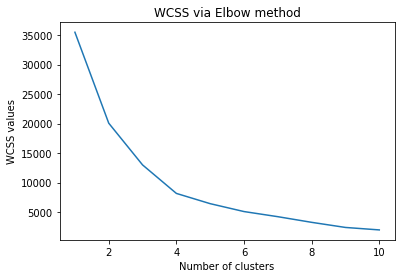

In [6]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 21)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("WCSS via Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS values")
plt.show()

## K Means Model Training on Training set

In [7]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(X)

In [8]:
print(y_means)

[0 0 3 0 1 1 2 2 3 3 2 1 0 0 2 1 1 0 2 0 0 2 0 3 2 2 0 2 3 0]


## Visualizing Clusters

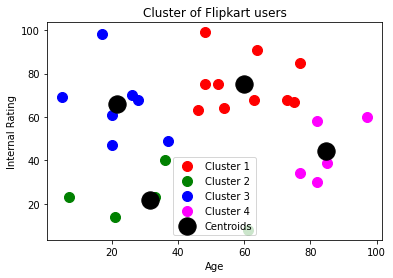

In [9]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')

plt.title('Cluster of Flipkart users')
plt.xlabel('Age')
plt.ylabel('Internal Rating')
plt.legend()
plt.show()